In [2]:
import pandas as pd

In [3]:
players = pd.read_csv('all_seasons.csv')
players.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [4]:
teams = players.groupby(by=['team_abbreviation', 'season']).mean()
teams.head()

Unnamed: 0        age  player_height  \
team_abbreviation season                                           
ATL               1996-97   197.470588  27.529412     203.797647   
                  1997-98   703.250000  28.250000     199.231250   
                  1998-99  1110.000000  28.500000     199.571429   
                  1999-00  1469.307692  26.692308     201.246154   
                  2000-01  1948.937500  26.187500     200.025000   

                           player_weight         gp       pts       reb  \
team_abbreviation season                                                  
ATL               1996-97     103.098793  46.529412  7.129412  3.552941   
                  1997-98      99.166551  49.187500  7.575000  3.350000   
                  1998-99     100.470628  36.571429  7.821429  3.721429   
                  1999-00     100.662532  60.615385  8.838462  4.038462   
                  2000-01      97.890824  50.000000  6.775000  2.868750   

                                ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
team_abbreviation season                                                        
ATL               1996-97  1.376471   -4.382353  0.069824  0.166176  0.195000   
                  1997-98  1.556250   -2.031250  0.060813  0.129188  0.179187   
                  1998-99  1.364286   -2.850000  0.055071  0.123357  0.207429   
                  1999-00  1.776923   -7.192308  0.056538  0.126923  0.194385   
                  2000-01  1.700000   -6.162500  0.054000  0.113625  0.173500   

                             ts_pct   ast_pct  
team_abbreviation season                       
ATL               1996-97  0.447706  0.106176  
                  1997-98  0.499937  0.115812  
                  1998-99  0.477643  0.178357  
                  1999-00  0.504231  0.135000  
                  2000-01  0.427938  0.149063

In [5]:
average_height = teams['player_height'].reset_index()
average_height.head()

,team_abbreviation,season,player_height
0,ATL,1996-97,203.797647
1,ATL,1997-98,199.231250
2,ATL,1998-99,199.571429
3,ATL,1999-00,201.246154
4,ATL,2000-01,200.025000


In [6]:
records = pd.read_csv('Team_Records.csv')
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [7]:
records['Team'] = records['Team'].apply(lambda x: x.replace("*","")) 
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [8]:
records['Team'].unique()

array(['Boston Celtics', 'Toronto Raptors', 'New York Knicks',
       'Philadelphia 76ers', 'Syracuse Nationals', 'Brooklyn Nets',
       'New Jersey Nets', 'New York Nets', 'New Jersey Americans',
       'Minnesota Timberwolves', 'Oklahoma City Thunder',
       'Seattle SuperSonics', 'Denver Nuggets', 'Denver Rockets',
       'Portland Trail Blazers', 'Utah Jazz', 'New Orleans Jazz',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Fort Wayne Pistons',
       'Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls',
       'Golden State Warriors', 'San Francisco Warriors',
       'Philadelphia Warriors', 'Los Angeles Clippers',
       'San Diego Clippers', 'Buffalo Braves', 'Phoenix Suns',
       'Sacramento Kings', 'Kansas City Kings', 'Kansas City-Omaha Kings',
       'Cincinnati Royals', 'Rochester Royals', 'Los Angeles Lakers',
       'Minneapolis Lakers', 'Washington Wizards', 'Washington Bullets',
       'Capital Bullets', 'Baltimore Bullets', 'Chicago Zephyrs',
       'Chicago Pac

In [9]:
seasons = average_height['season'].unique()
print(seasons)

['1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02' '2002-03'
 '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10'
 '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16' '2016-17'
 '2017-18' '2018-19' '2019-20']


In [10]:
records = records[records['Season'].isin(seasons)]
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [11]:
records['Team'].unique()

array(['Boston Celtics', 'Toronto Raptors', 'New York Knicks',
       'Philadelphia 76ers', 'Brooklyn Nets', 'New Jersey Nets',
       'Minnesota Timberwolves', 'Oklahoma City Thunder',
       'Seattle SuperSonics', 'Denver Nuggets', 'Portland Trail Blazers',
       'Utah Jazz', 'Cleveland Cavaliers', 'Detroit Pistons',
       'Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls',
       'Golden State Warriors', 'Los Angeles Clippers', 'Phoenix Suns',
       'Sacramento Kings', 'Los Angeles Lakers', 'Washington Wizards',
       'Washington Bullets', 'Miami Heat', 'Charlotte Hornets',
       'Charlotte Bobcats', 'Orlando Magic', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'New Orleans Pelicans',
       'New Orleans Hornets', 'New Orleans/Oklahoma City Hornets',
       'Dallas Mavericks', 'Memphis Grizzlies', 'Vancouver Grizzlies'],
      dtype=object)

In [12]:
average_height['team_abbreviation'].unique()

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN',
       'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL',
       'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI',
       'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS'],
      dtype=object)

In [13]:
abbreviations = {}
with open('NBA_Team_Abbr-Sheet1.csv') as f:
    for row in f:
        abbreviation, name = row.strip().split(",")
        abbreviations[name] = abbreviation

abbreviations['New Jersey Nets'] = 'NJN'
abbreviations['Charlotte Bobcats'] = 'CHA'
abbreviations['Seattle SuperSonics'] = 'SEA'
abbreviations['Washington Bullets'] = 'WAS'
abbreviations['New Orleans/Oklahoma City Hornets'] = 'NOK'
abbreviations['New Orleans Hornets'] = 'NOH'
abbreviations['Vancouver Grizzlies'] = 'VAN'

abbreviations

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'New Jersey Nets': 'NJN',
 'Charlotte Bobcats': 'CHA',
 'Seattle SuperSonics': 'SEA',
 'Washington Bullets': 'WAS',
 'New Orleans/Oklahoma City Hornets': 'NO

In [14]:
records['team_abbreviation'] = records['Team'].apply(lambda x: abbreviations[x])
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,team_abbreviation
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7),BOS
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),BOS
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),BOS
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),BOS
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1),BOS


In [15]:
records = records.rename(columns={"Season": "season"})
records.head()

,season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,team_abbreviation
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7),BOS
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),BOS
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),BOS
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),BOS
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1),BOS


In [37]:
average_height_success = pd.merge(average_height, records, on=['season', 'team_abbreviation'])
average_height_success = average_height_success.drop(['W', 'L', 'Coaches', 'Top WS', 'Team', 'Lg', 'Finish'], axis=1)

<AxesSubplot:xlabel='player_height', ylabel='W/L%'>

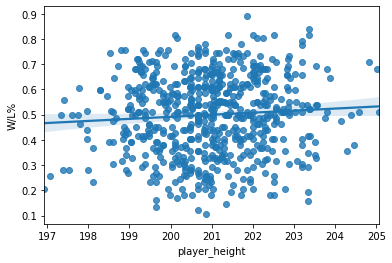

In [41]:
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import polyfit

sns.regplot(x=average_height_success['player_height'], y=average_height_success['W/L%'])

<AxesSubplot:>

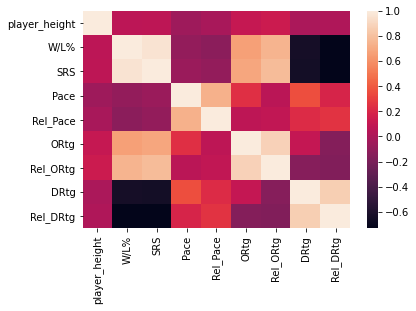

In [39]:
sns.heatmap(average_height_success.corr())